# Graduate Admission 

Nous allons étudier les facteurs qui déterminent l'admission d'un élève à un master en université américaine. 

Parmi ces facteurs, on compte : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

0. Importez les librairies usuelles

In [181]:
import pandas as pd
import seaborn as sns

1. Importez le dataset et affichez le sous forme de DataFrame 

In [182]:
df = pd.read_csv("../../src/Admission_Predict.csv", index_col=0)
df.columns = [column.strip() for column in df.columns]

In [183]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


2. Notre variable est exprimée comme une probabilité. On voudrait que ce soit plutôt une classe. Remplacez donc toutes les probabilités supérieures à 75% par 1 et les autres par 0 

In [184]:
df["Chance of Admit"] = (df["Chance of Admit"] > 0.75).astype(int)

3. Regardez la répartition de GRE Score par rapport à l'admission 

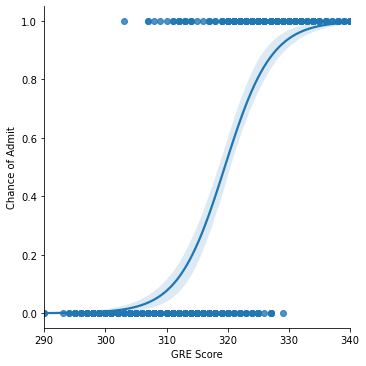

In [185]:
sns.lmplot(data=df, x="GRE Score", y="Chance of Admit", logistic=True)

4. Faites de même avec le Toefl Score  / CGPA

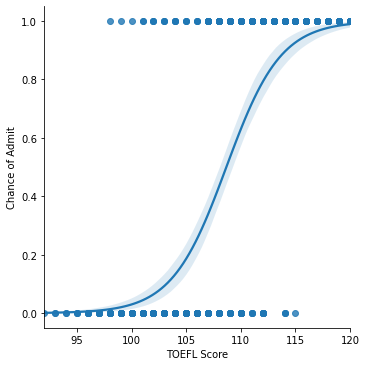

In [186]:
sns.lmplot(data=df, x="TOEFL Score", y="Chance of Admit", logistic=True)

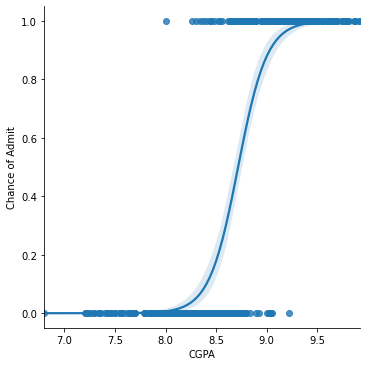

In [187]:
sns.lmplot(data=df, x="CGPA", y="Chance of Admit", logistic=True)

5. Faites un barplot sur la colonne LOR / SOP / University Rating / Research

<AxesSubplot:xlabel='LOR', ylabel='Chance of Admit'>

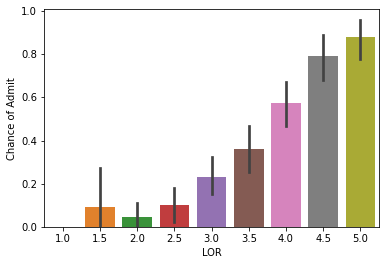

In [188]:
sns.barplot(data=df, x="LOR",y="Chance of Admit")

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

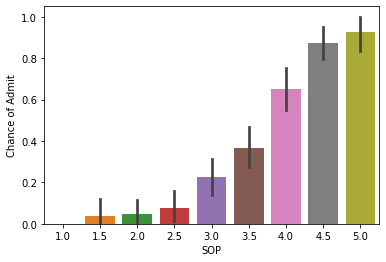

In [189]:
sns.barplot(data=df, x="SOP",y="Chance of Admit")

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

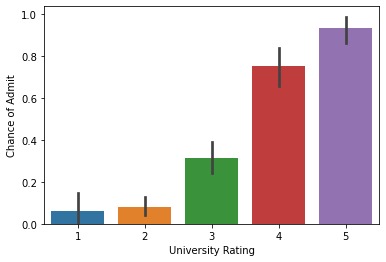

In [190]:
sns.barplot(data=df, x="University Rating", y="Chance of Admit")

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

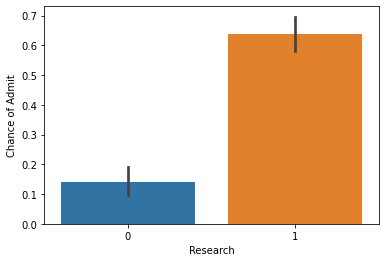

In [191]:
sns.barplot(data=df, x="Research", y="Chance of Admit")

6. Séparez votre dataset en variables explicatives : ```X``` & variable cible : ```y``` 

In [192]:
target_variable = "Chance of Admit"

X = df.loc[:, [column for column in df if column != target_variable]]
y = df.loc[:, [target_variable]]

7. Séparez votre dataset en données d'entrainement et de test 

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

8. Tentez de faire un premier arbre de décision et évaluez votre score dans une matrice de confusion

In [244]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [245]:
print(f"Train score : {dt.score(X_train, Y_train)}, Test score : {dt.score(X_test, Y_test)}")

Train score : 1.0, Test score : 0.89


9. Visualisez votre arbre via graphviz 

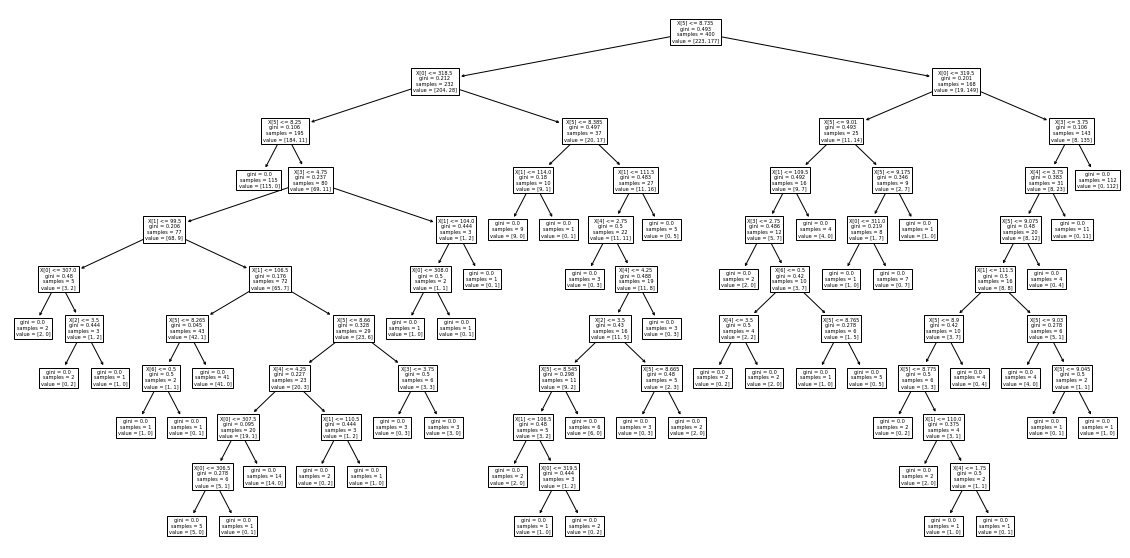

In [246]:
plt.figure(figsize=(20,10))
plot_tree(dt) 
plt.show()

10. Classez les features les plus importantes qui déterminent les admissions 

<AxesSubplot:xlabel='score', ylabel='features'>

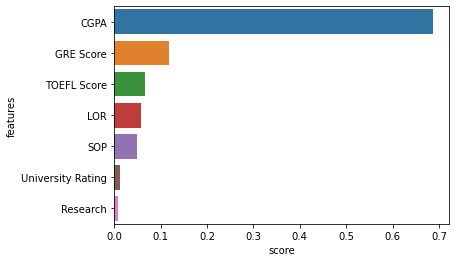

In [247]:
feature_importance = pd.DataFrame({"features": X.columns, "score":dt.feature_importances_})
sns.barplot(data=feature_importance.sort_values("score", ascending=False), x="score", y="features")

11. Essayons d'améliorer notre score. Faites une Random Forest avec 50 arbres de decision

In [248]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(50, random_state=0)
rf.fit(X_train, Y_train.values.ravel())
print(f"Train score : {rf.score(X_train, Y_train)}, Test score : {rf.score(X_test, Y_test)}")

Train score : 1.0, Test score : 0.94


12. Tentez de refaire le modèle avec uniquement 20 arbres 

In [249]:
rf = RandomForestClassifier(20, random_state=0)
rf.fit(X_train, Y_train.values.ravel())
print(f"Train score : {rf.score(X_train, Y_train)}, Test score : {rf.score(X_test, Y_test)}")

Train score : 0.99, Test score : 0.96


---> Il semblerait qu'il y ait un nombre optimum d'arbres.

13. Faites une Grid Search pour trouver le nombre optimum d'arbres 

In [250]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(range(1, 50))}
clf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
clf.fit(X_train, Y_train.values.ravel())
clf.best_params_

{'n_estimators': 32}

In [251]:
print(f"Train score : {clf.score(X_train, Y_train)}, Test score : {clf.score(X_test, Y_test)}")

Train score : 0.995, Test score : 0.94


14. Regardez les feature importance 

In [252]:
rf.feature_importances_

array([0.2739749 , 0.17315045, 0.10707022, 0.07243337, 0.07520649,
       0.26107413, 0.03709044])

<AxesSubplot:xlabel='score', ylabel='features'>

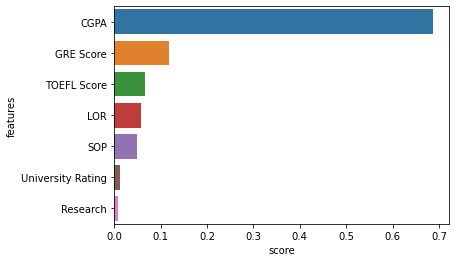

In [253]:
feature_importance = pd.DataFrame({"features": X.columns, "score":dt.feature_importances_})
sns.barplot(data=feature_importance.sort_values("score", ascending=False), x="score", y="features")